# Chapter 03: 2 次元データの整理 first

In [3]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision', 3)

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
path = '/Users/yanaichiharu/c_data/Learning_Math/python_stat_sample-master/'
df = pd.read_csv(path + '/data/ch2_scores_em.csv', index_col='生徒番号')

In [5]:
en_scores = np.array(df['英語'])[:10]
ma_scores = np.array(df['数学'])[:10]

In [6]:
scores_df = pd.DataFrame({'英語': en_scores,
                         '数学': ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='生徒'))

scores_df

,英語,数学
生徒,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


## 3.1　|　2 つのデータの関係性の指標

### 3.1.1　共分散

共分散が正であれば正の相関, 負であれば負の相関がある. 0 に近ければ無相関を表す.

In [7]:
summary_df = scores_df.copy()

summary_df['英語の偏差'] = \
    summary_df['英語'] - summary_df['英語'].mean()

summary_df['数学の偏差'] = \
    summary_df['数学'] - summary_df['数学'].mean()

summary_df['偏差同士の積'] = \
    summary_df['英語の偏差'] * summary_df['数学の偏差']

summary_df

,英語,数学,英語の偏差,数学の偏差,偏差同士の積
生徒,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [8]:
summary_df['偏差同士の積'].mean()

62.8

$共分散を S_{xy} とすると \\
S_{xy} = \frac{1}{n} \sum_{i = 1}^{n} (x_{i} - \bar{x})(y_{i} - \bar{y})$

In [9]:
# 共分散行列を求める

cov_mat = np.cov(en_scores, ma_scores, ddof=0)

# [0, 1] 成分と [1, 0] 成分が共分散
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [10]:
print(cov_mat[0, 1], cov_mat[1, 0])
print(cov_mat[0, 0], cov_mat[1, 1])
print(np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0))

62.800000000000004 62.800000000000004
86.0 68.44000000000001
86.0 68.44000000000001


### 3.1.2　相関係数

共分散は各データの単位をかけたものになるので, 各データの標準偏差で割る事で単位に依存しない指標を定義できる.

$相関係数を r_{xy} とすると \\
\begin{eqnarray}
r_{xy} &=& \frac{S_{xy}}{S_{x} S_{y}}\\
       &=& \frac{1}{n} \sum_{i = 1}^{n} (\frac{x_{i} - \bar{x}}{S_{x}}) (\frac{y_{i} - \bar{y}}{S_{y}})
\end{eqnarray}$

In [11]:
S_xy = np.cov(en_scores, ma_scores, ddof=0)[0, 1]
S_x = np.std(en_scores)
S_y = np.std(ma_scores)

S_xy / (S_x * S_y)

0.8185692341186713

In [12]:
# 相関行列
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [13]:
scores_df.corr()

,英語,数学
英語,1.000,0.819
数学,0.819,1.000


## 3.2 |　2 次元データの視覚化

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

### 3.2.1　散布図

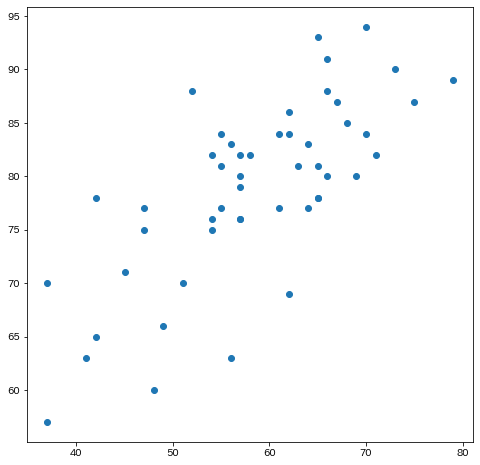

In [15]:
english_s = np.array(df['英語'])
math_s = np.array(df['数学'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.scatter(english_s, math_s)

### 3.2.2　回帰直線

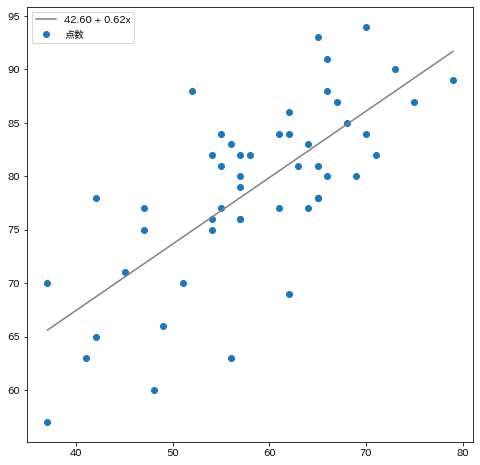

In [17]:
p_fit = np.polyfit(english_s, math_s, 1)
p_ld = np.poly1d(p_fit)

xs = np.linspace(english_s.min(), english_s.max())
ys = p_ld(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(english_s, math_s, label='点数')
ax.plot(xs, ys, color='gray',
       label=f'{p_fit[1]:.2f} + {p_fit[0]:.2f}x')

ax.legend(loc='upper left')

### 3.2.3　ヒートマップ

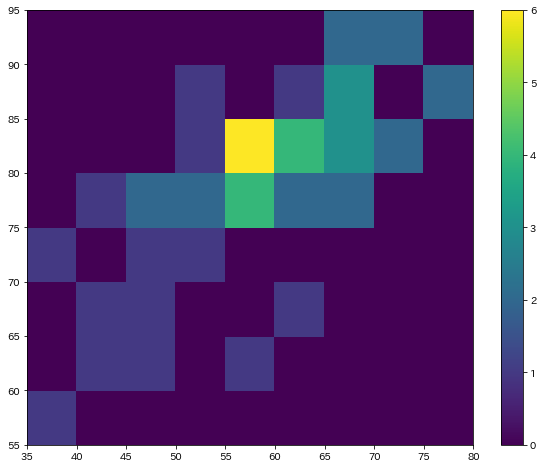

In [18]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_s, math_s,
             bins=[9, 8], range=[(35, 80), (55, 95)])

ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax=ax)

## 3.3　|　アンスコムの例

同じ指標をもつデータでも視覚化してみると全然違うかもっていう例

In [19]:
path = '/Users/yanaichiharu/c_data/Learning_Math/python_stat_sample-master/'
ans_df = np.load(path + '/data/ch3_anscombe.npy')

In [20]:
print(ans_df.shape)
ans_df[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [26]:
stats_df = pd.DataFrame(index=['Xの平均', 'Xの分散', 'Yの平均', 'Yの分散', 'XとYの相関係数',
                                'X と Y の回帰直線'])
for i, data in enumerate(ans_df):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY):.2f}',
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
         f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
Xの平均,9.00,9.00,9.00,9.00
Xの分散,10.00,10.00,10.00,10.00
Yの平均,7.50,7.50,7.50,7.50
Yの分散,3.75,3.75,3.75,3.75
XとYの相関係数,0.82,0.82,0.82,0.82
X と Y の回帰直線,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


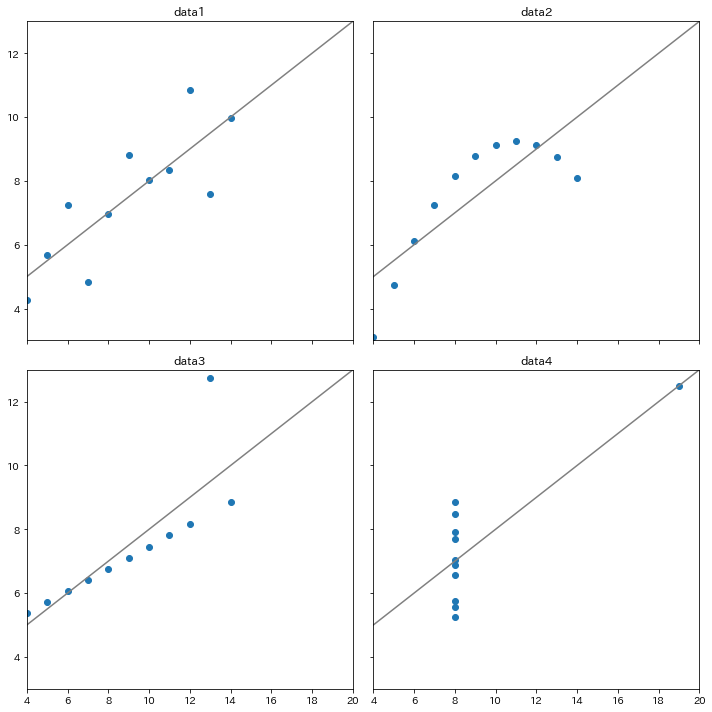

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)
xs = np.linspace(0, 30, 100)
for i, data in enumerate(ans_df):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

plt.tight_layout()